<a href="https://colab.research.google.com/github/AhohPerisic/kmg/blob/main/Mnist%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 23102311 김민규

# Mnist

In [22]:
# 진행전 시드 값을 모두 고정하여 진행 하겠습니다!
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# MNIST 데이터셋 로드
mnist = fetch_openml('mnist_784')

# 데이터와 라벨 분리
X, y = mnist['data'], mnist['target']

# 훈련 세트와 테스트 세트로 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [23]:
# 랜덤 포레스트 분류기 모델 초기화 및 훈련
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [24]:
# 테스트 세트에 대한 예측
y_pred = rf_clf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


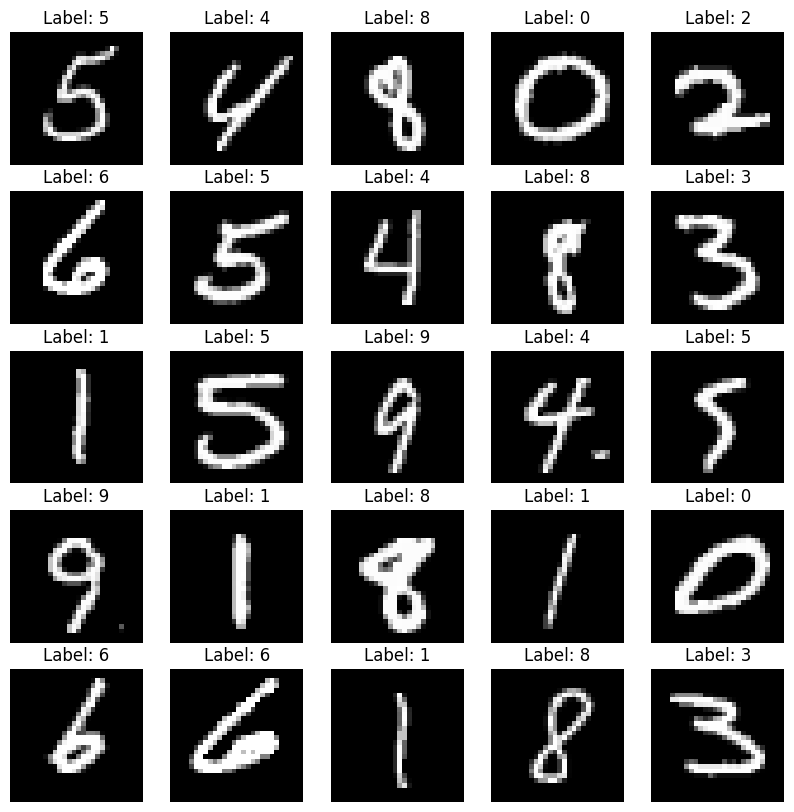

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# MNIST 데이터셋 로드
mnist = fetch_openml('mnist_784', as_frame=False)

# 데이터와 라벨 분리
X, y = mnist['data'], mnist['target']

# 훈련 세트와 테스트 세트로 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 이미지 데이터 시각화
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f'Label: {y_train[i]}')
plt.show()




In [33]:
# Confusion matrix 출력
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[1325    0    4    0    1    1    3    1    6    2]
 [   0 1573    6    8    2    0    0    6    3    2]
 [   4    5 1334    4    5    1    9    8    8    2]
 [   1    0   23 1366    0    9    0   14   12    8]
 [   4    1    3    0 1257    0    2    3    3   22]
 [   1    3    3   17    4 1226    8    1    8    2]
 [   4    1    0    0    6   10 1372    0    3    0]
 [   3    5   15    0    7    1    0 1455    2   15]
 [   1    6    9   15    6   11    5    7 1290    7]
 [   4    6    5   16   20    5    1   10    9 1344]]


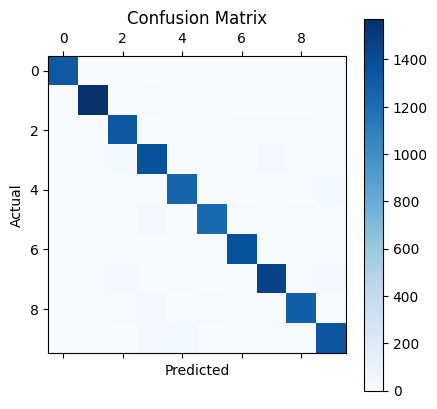

In [35]:
# Confusion matrix 시각화
from sklearn.metrics import confusion_matrix

# 혼동 행렬 계산
conf_matrix = confusion_matrix(y_test, y_pred)

# Confusion matrix 시각화
plt.matshow(conf_matrix, cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



Confusion matrix을 시각화 해보니 1과 7이 어두워 보입니다.
샘플 수를 확인하여 데이터가 불균형한지 보도록 하겠습니다.

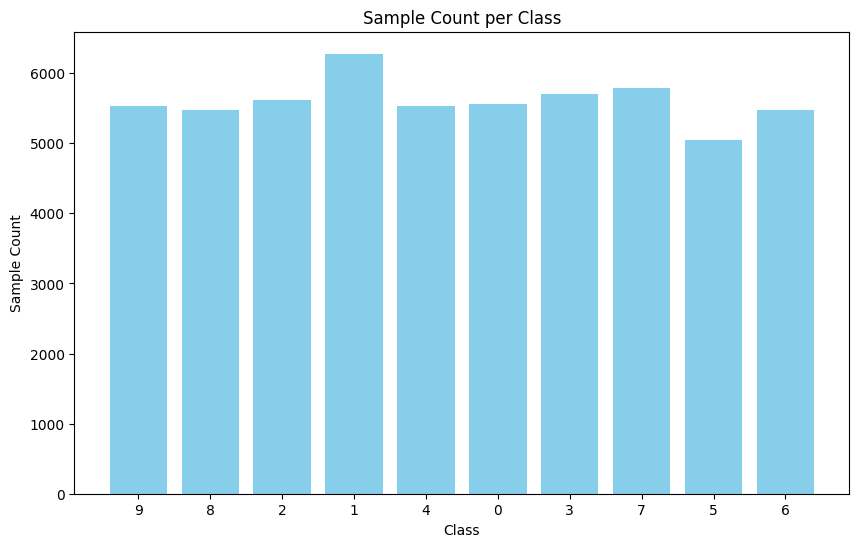

In [37]:
# 클래스별 샘플 수 계산
class_samples_count = {}
for label in set(y):
    class_samples_count[label] = np.sum(y_train == label)

# 샘플 수 확인하기
plt.figure(figsize=(10, 6))
plt.bar(class_samples_count.keys(), class_samples_count.values(), color='skyblue')
plt.xlabel('Class')
plt.ylabel('Sample Count')
plt.title('Sample Count per Class')
plt.show()


1. 샘플 수를 확인 해보니 Mnist는 데이터가 모두 고르게 분포 돼 있음을 확인..
2. precision 과 Recall, F1-score, 정확도 구하기![TomekLinks.png](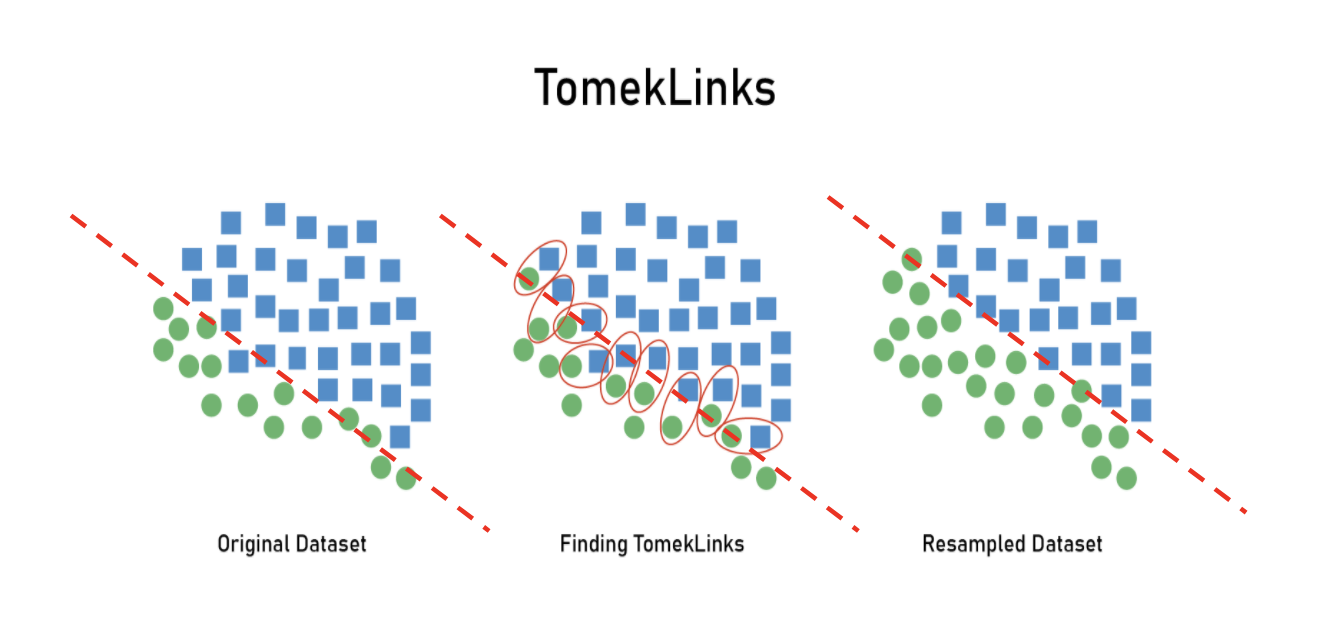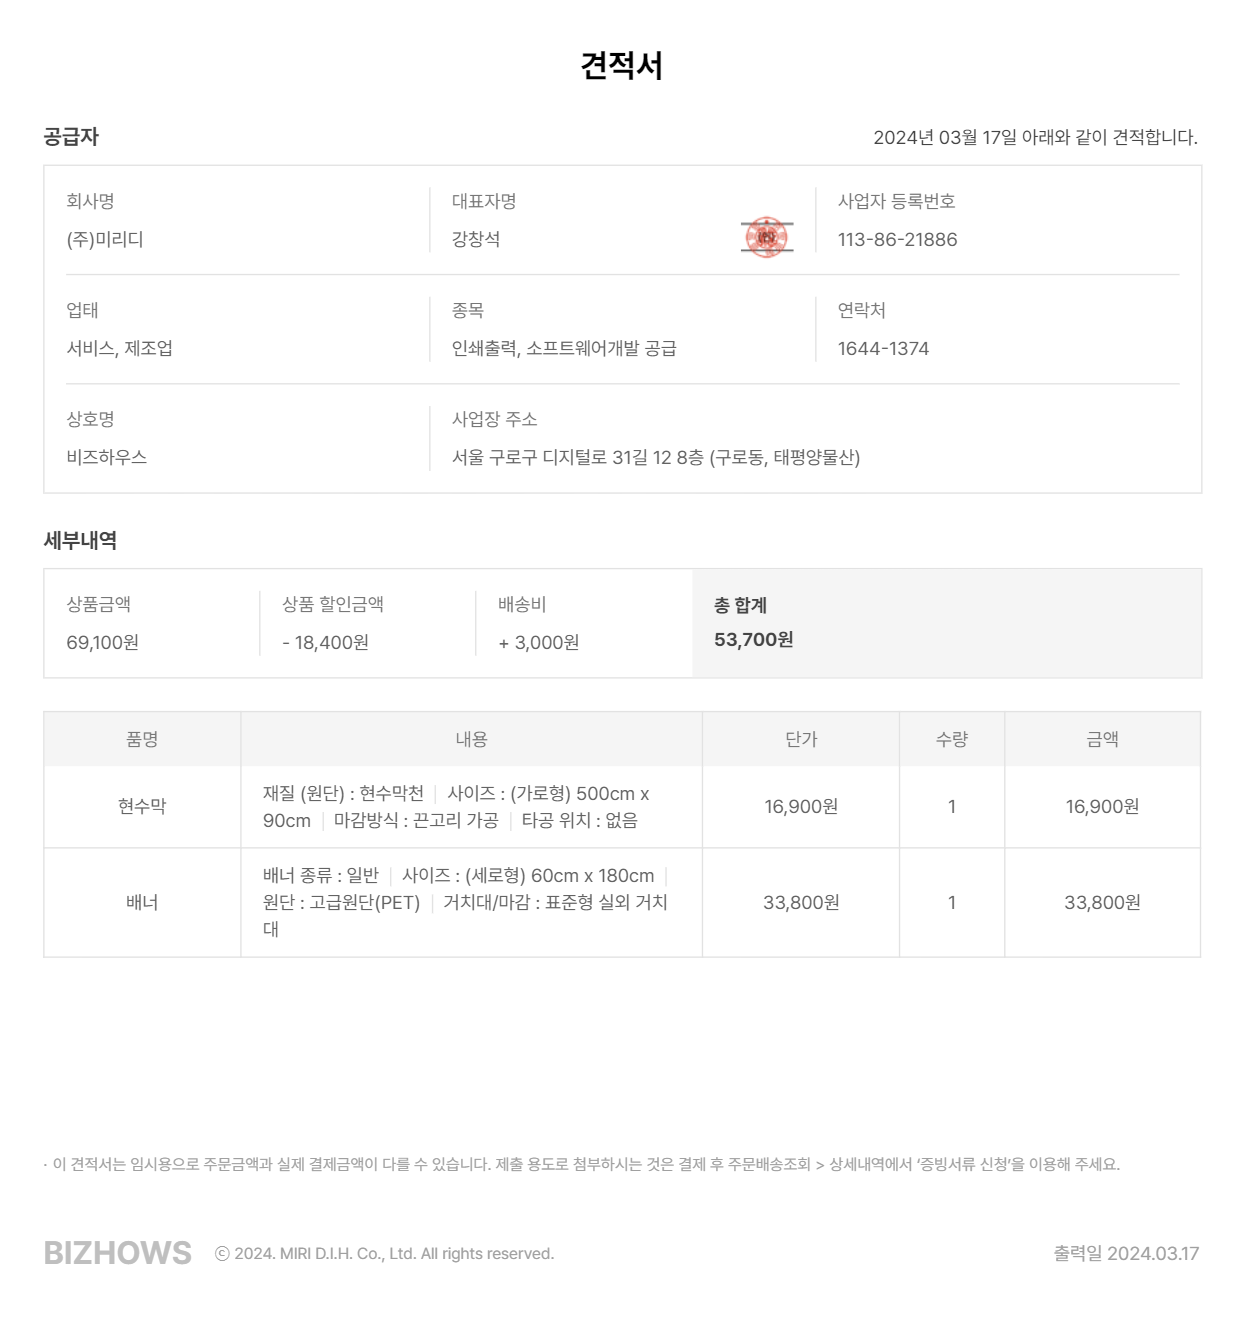).

In [38]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Precision 계산
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)

# Recall 계산
recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)

# F1 점수 계산
f1_score = 2 * (precision * recall) / (precision + recall)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


Precision: [0.98366741 0.983125   0.95149786 0.95792426 0.96100917 0.96993671
 0.98       0.96677741 0.95982143 0.95726496]
Recall: [0.98659717 0.983125   0.96666667 0.95324494 0.97065637 0.96307934
 0.98280802 0.96806387 0.95062638 0.94647887]
F1 Score: [0.98513011 0.983125   0.95902229 0.95557887 0.96580868 0.96649586
 0.981402   0.96742021 0.95520178 0.95184136]


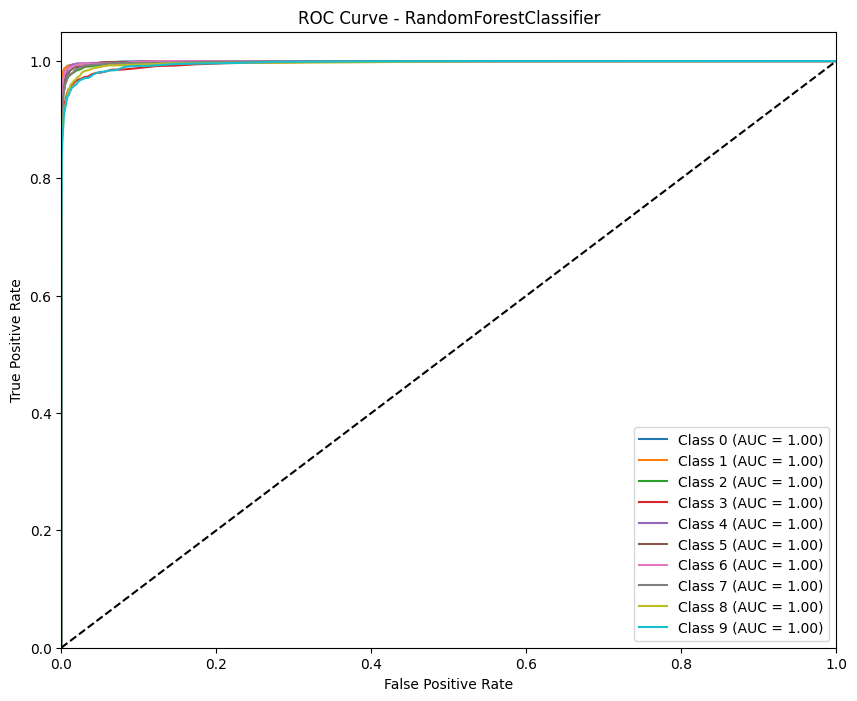

In [40]:
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier


# 데이터 전처리: 특성 스케일링
X = X / 255.0

# 클래스를 이진화
y = label_binarize(y, classes=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

# 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 분류기 학습
clf = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
clf.fit(X_train, y_train)

# 각 클래스에 대한 예측 확률 계산
y_score = clf.predict_proba(X_test)

# ROC 곡선 계산 및 시각화
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - RandomForestClassifier')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# 정확도 출력
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9672857142857143


In [21]:
# 예측 결과 시각화
plt.figure(figsize=(12, 5))
for i in range(10):
    # 테스트 세트에서 실제 라벨과 예측 라벨이 일치하지 않는 경우에 대해 예측 결과 시각화
    wrong_pred_indices = np.where((y_test != y_pred) & (y_test.astype(int) == i))[0]
    num_wrong_pred = len(wrong_pred_indices)

    # 잘못 예측된 이미지 중 첫 번째 이미지를 플롯
    if num_wrong_pred > 0:
        plt.subplot(2, 5, i+1)
        plt.imshow(X_test[wrong_pred_indices[0]].reshape(28, 28), cmap='gray')
        plt.title(f'Predicted: {y_pred[wrong_pred_indices[0]]}\nActual: {y_test[wrong_pred_indices[0]]}')
        plt.a

NameError: name 'y_pred' is not defined

<Figure size 1200x500 with 0 Axes>

결과 분석 하기: 높은 정확도를 구하기 위해 confusion matrix를 구해봐 시각화 하고 데이터 샘플이 고르게 분포 돼 있는지 파악하였습니다. 오버피팅, 언더피팅을 피하기 위해 Mnist 데이터셋에 적합한 모델로 Random-forest 모델을 선택하였습니다.

*   Random-forest 모델을 사용한 이유

1. 이 데이터는 숫자 0~9까지의 multi-class 데이터입니다..
2. Mnist는 데이터셋 샘플이 많이 존재합니다.
3. Randomforest는 여러 의사 결정 트리를 결정하고 앙상블을 생성해내는 모델이기 때문에 multiple data에 적합해 보여 사용하였습니다.
4. ROC curve를 통해 점선 거리를 확인하여 좋은 분류기임을 확인하였다.
이러한 이유로 Random forest 모델을 사용하였으며격 정확도 0.96, f1-score는 0.97이라는 성능이 나왔습니다.

# 데이터간 불균형이 있는 샘플을 검증하기





불균형한 데이터셋은 한쪽의 데이터만 불균등하게 분포 돼 있는 것을 말하며
이를 해결하기 위한 여러가지 검증방법으로는 데이터 리셈플링,토멕링크 방법론,ADASYN, 가중치 조정 밥법이 있습니다.

1. 데이터 리셈플링:
불균형한 데이터를 삭제하거나 (오버샘플링) 데이터를 추가한다 (언더샘플링)

2. 토멕링크 방법론:
서로 다른 클래스가 있을 때 서로 다른 클래스끼리 가장 가까운 데이터들이 토멕링크로 묶여서 토멕링크 중 분포가 높은 데이터를 제거하는 방법론입니다.

3.. ADASYN(Adaptive Synthetic Sampling):
ADASYN 방법론은 분포가 작은 클래스 데이터와 그 데이터와 가장 가까운 무작위의 K개의 데이터 사이에 가상의 직선을 그려서 직선상에 존재하는 가상의 분포가 작은 클래스 데이터를 생성하는 것을 말합니다.

4. 가중치 조정 방법(SMOTE): 불균형한 클래스의 샘플에 가중치를 부여하여 모델 학습 시 소수 클래스에 더 큰 중요도를 부여하는 방법으로 해결한다.

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.svm import SVC

n0 = 200
n1 = 20

rv1 = sp.stats.multivariate_normal([-1, 0], [[1, 0], [0, 1]])
rv2 = sp.stats.multivariate_normal([+1, 0], [[1, 0], [0, 1]])
X0 = rv1.rvs(n0, random_state=0)
X1 = rv2.rvs(n1, random_state=0)
X_imb = np.vstack([X0, X1])
y_imb = np.hstack([np.zeros(n0), np.ones(n1)])

x1min = -4
x1max = 4
x2min = -2
x2max = 2
xx1 = np.linspace(x1min, x1max, 1000)
xx2 = np.linspace(x2min, x2max, 1000)
X1, X2 = np.meshgrid(xx1, xx2)

def classification_result2(X, y, title=""):
    plt.contour(X1, X2, rv1.pdf(np.dstack([X1, X2])), levels=[0.05], linestyles="dashed")
    plt.contour(X1, X2, rv2.pdf(np.dstack([X1, X2])), levels=[0.05], linestyles="dashed")
    model = SVC(kernel="linear", C=1e4, random_state=0).fit(X, y)
    Y = np.reshape(model.predict(np.array([X1.ravel(), X2.ravel()]).T), X1.shape)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], marker='x', label="0 클래스")
    plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='o', label="1 클래스")
    plt.contour(X1, X2, Y, colors='k', levels=[0.5])
    y_pred = model.predict(X)
    plt.xlim(-4, 4)
    plt.ylim(-3, 3)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(title)
    return model


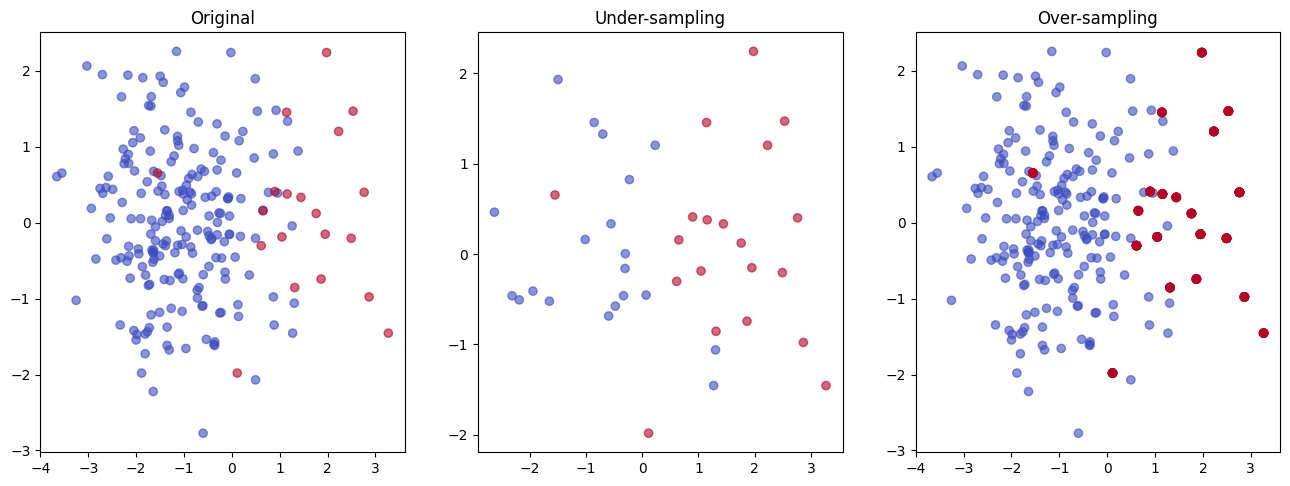

In [42]:
# 1번 예시

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.svm import SVC
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

n0 = 200
n1 = 20

rv1 = sp.stats.multivariate_normal([-1, 0], [[1, 0], [0, 1]])
rv2 = sp.stats.multivariate_normal([+1, 0], [[1, 0], [0, 1]])
X0 = rv1.rvs(n0, random_state=0)
X1 = rv2.rvs(n1, random_state=0)
X_imb = np.vstack([X0, X1])
y_imb = np.hstack([np.zeros(n0), np.ones(n1)])

x1min = -4
x1max = 4
x2min = -2
x2max = 2
xx1 = np.linspace(x1min, x1max, 1000)
xx2 = np.linspace(x2min, x2max, 1000)
X1, X2 = np.meshgrid(xx1, xx2)

def classification_result2(X, y, title=""):
    plt.contour(X1, X2, rv1.pdf(np.dstack([X1, X2])), levels=[0.05], linestyles="dashed")
    plt.contour(X1, X2, rv2.pdf(np.dstack([X1, X2])), levels=[0.05], linestyles="dashed")
    model = SVC(kernel="linear", C=1e4, random_state=0).fit(X, y)
    Y = np.reshape(model.predict(np.array([X1.ravel(), X2.ravel()]).T), X1.shape)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], marker='x', label="0 클래스")
    plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='o', label="1 클래스")
    plt.contour(X1, X2, Y, colors='k', levels=[0.5])
    y_pred = model.predict(X)
    plt.xlim(-4, 4)
    plt.ylim(-3, 3)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(title)
    return model


# 언더 샘플링
rus = RandomUnderSampler(random_state=0)
X_under, y_under = rus.fit_resample(X_imb, y_imb)

# 오버 샘플링
ros = RandomOverSampler(random_state=0)
X_over, y_over = ros.fit_resample(X_imb, y_imb)

# 시각화
plt.figure(figsize=(16, 12))

plt.subplot(2, 3, 1)
plt.scatter(X_imb[:, 0], X_imb[:, 1], c=y_imb, marker='o', cmap='coolwarm', alpha=0.6, label='Original')
plt.title('Original')

plt.subplot(2, 3, 2)
plt.scatter(X_under[:, 0], X_under[:, 1], c=y_under, marker='o', cmap='coolwarm', alpha=0.6, label='Under-sampling')
plt.title('Under-sampling')

plt.subplot(2, 3, 3)
plt.scatter(X_over[:, 0], X_over[:, 1], c=y_over, marker='o', cmap='coolwarm', alpha=0.6, label='Over-sampling')
plt.title('Over-sampling')

plt.show()


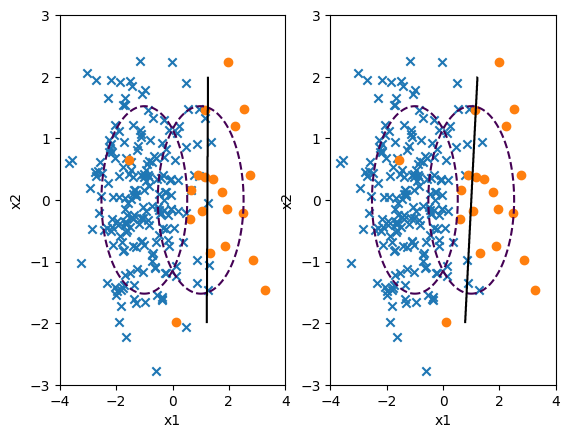

In [43]:
# 2번 예시

from imblearn.under_sampling import TomekLinks

X_samp, y_samp = TomekLinks().fit_resample(X_imb, y_imb)


plt.subplot(121)
classification_result2(X_imb, y_imb)
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)

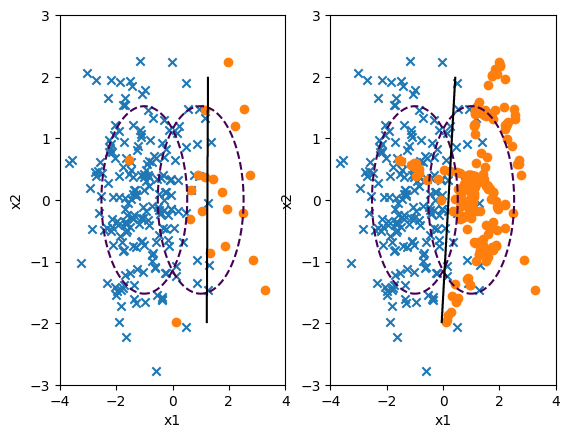

In [44]:
# 3번 ADASYN 예시
from imblearn.over_sampling import ADASYN

X_samp, y_samp = ADASYN(random_state=0).fit_resample(X_imb, y_imb)


plt.subplot(121)
classification_result2(X_imb, y_imb)
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)

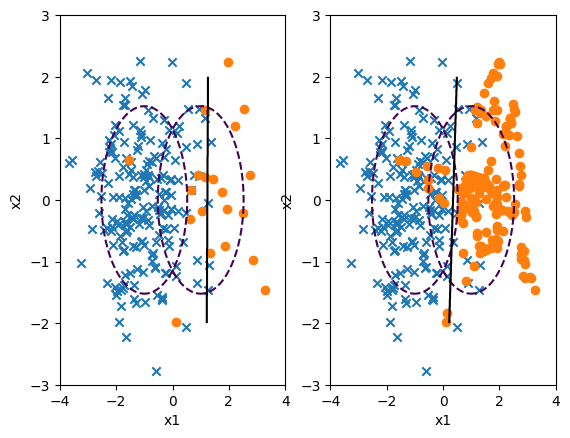

In [45]:
# 4 번
from imblearn.over_sampling import SMOTE

X_samp, y_samp = SMOTE(random_state=4).fit_resample(X_imb, y_imb)

plt.subplot(121)
classification_result2(X_imb, y_imb)
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)
